## Homework 4

This assignment is about fitting models to data and analyzing data to determine statistical quantities. Data analysis is a major part of an engineer's ability to extract useful and actionable information from data.

* Nonlinear regression
* Statistical and other functions
* Create bar plot

### Problem #1

Heart rate data (Beats per minute or BPM) as a function of time (sec) for a twenty-minute period of constant exertion is found at:

* <a href='https://apmonitor.com/che263/uploads/Main/heart_rate.txt' target='_blank'>Heart Rate Data, URL: https://apmonitor.com/che263/uploads/Main/heart_rate.txt</a>

The time of each measurement, in seconds, in listed in the first column, and the measured heart rate, in beats per minute, in the second column. 

***Action:*** Import the data, print the first 5 rows, and print summary statistics.

***Action:*** Create a function that returns the predicted BPM given the time (t) and the four constants.


***Action:*** To obtain good guess values, plot the data and the function before trying the solver. Providing good guess values is the key to getting a solution.

* $c_0$ and $c_2$ are in the range of $50$ to $200$
* $c_1$ and $c_3$ are closer to $0.01$

***Action:*** Fit the data to the following correlation by adjusting the values of $c_0$, $c_1$, $c_2$, $c_3$ using ```scipy.optimize.curve_fit```.

$BPM=c_0+c_1 \, t-c_2 e^{-c_3 \, t}$

Determine the values of c0, c1, c2, and c3 that minimize the error between the model prediction and measured values.

***Action:*** Calculate the $R^2$ value for the fit.  Values closer to $1$ are a better fit than those closer to $0$. One method is to use ```sklearn```:

```python
from sklearn.metrics import r2_score
print('R^2: ', r2_score(yp,ym))
```

where ```yp``` are the predicted values and ```ym``` are the measured values. The $R^2$ value should be close to 0.98.

### Problem #2

This next exercise is similar to the one above but it also requires a conditional statement to determine if the time is past the dead-time limit. The following link contains data for the response of a first order system with time delay.  

* <a href='https://apmonitor.com/che263/uploads/Main/dynamics.txt' target='_blank'>Dynamic Data, URL: https://apmonitor.com/che263/uploads/Main/dynamics.txt</a>

Such step data is used to create controllers for automation. You will learn about this in <a href='https://apmonitor.com/pdc' target='_blank'>ChE 436, Process Dynamics and Control</a>.

***Action:*** Import the data, view the first 5 rows, generate a plot, and calculate summary statistics.

Conditional statements are used to direct the flow of the program to different commands based on whether a statement is ```True``` or ```False```. A boolean (```True``` or ```False```) is used to direct the flow with an ```if```, ```elif``` (else if), or ```else``` parts to the statement.

```python
x = 5
if (x<3):
    print('less than 3')
elif (x<4):
    print('between 3 and 4')
else:
    print('greater than 4')
```

As the value of ```x``` changes, a different message is printed. 

There is a switching function that equals *zero* when time is less than the dead-time $(\theta)$ and equals *one* when time is greater than or equal to the dead-time.

$S(t-\theta) = \left[ {\begin{array}{c} 0 \, \mathrm{when} \, t \lt \theta \\ 1 \, \mathrm{when} \, t\ge \theta \end{array} } \right]$

***Action:*** With an initial guess of $\theta$ = 0.4, calculate the value of $S(t-\theta)$ for all time points in the data.

***Action:*** Define a function ```yfcn``` that has input arguments of ```t``` (time), ```tau``` ($\tau$), and ```theta``` ($\theta).

```python
def yfcn(t,tau,theta):
```

The function should return the predicted ```y(t)``` values as a Numpy array.

***Action:*** Find the constants, $\tau$ and $\theta$, to best fit the process data, y(t).

$y(t)=5 \left( 1-\exp{\left(-\frac{t-\theta}{\tau}\right)} \right) S(t-\theta)$

Use ```scipy.optimize.curve_fit``` to find a solution:

```python
# yfcn=function name from above
# t=time
# ym=measured y(t)
c,cov = curve_fit(yfcn,t,ym)
```

***Action:*** Calculate the $R^2$ value for the fit. One method is to use ```sklearn```:

```python
from sklearn.metrics import r2_score
print('R^2: ', r2_score(yp,ym))
```

where ```yp``` are the predicted values and ```ym``` are the measured values.

***Action:*** Generate a plot that shows the data and the function with the optimized parameters. It should look similar to the plot shown below.

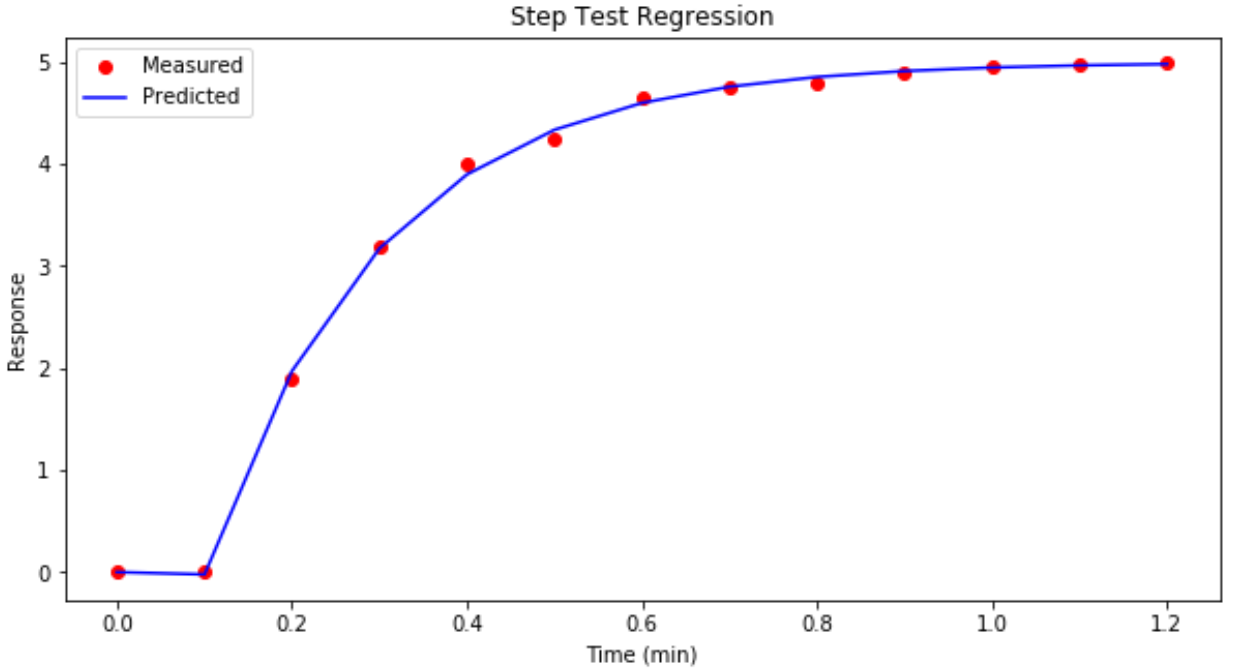

### Problem #3

Random numbers are important to simulate a physical process where there is a random fluctuation of the values. Some of the common random number generators in Numpy are shown in the table below.

| ***Function*** | ***Description*** |
| --- | --- |
| rand | Uniformly distributed values |
| randn | Normally distributed values |
| randint | Uniformly distributed integers in a given range |

A few examples are listed below:

*Generate two random numbers between 0 and 1*

```python
import numpy as np
print(np.random.rand(2))
Result: [0.90411793 0.01642428]
```

*Generate a random number between -1 and 1*

```python
print(np.random.rand()*2.0-1.0)
Result: -0.34398648976057977
```

*Generate a random integer between 1 and 10*

```python
print(np.random.randint(0,10)+1)
Result: 4
```

*Generate 50 normally distributed values and create a histogram bar chart to view the distribution.*

***Action:*** Increase the number of normally distributed points to ```n=1000``` and re-generate the plot.

[-5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.
  1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


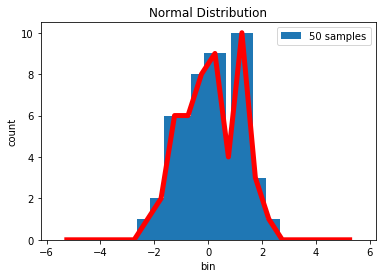

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
x = np.random.randn(n)

# count number in each bin
bins=np.linspace(-5.5,5.5,23)
print(bins)
hist, _ = np.histogram(x, bins)

# plot histogram data
plt.bar(bins[0:-1]+0.25,hist,label=str(n)+' samples')
plt.plot(bins[0:-1]+0.25,hist,'r-',lw=5)
plt.xlabel('bin')
plt.ylabel('count')
plt.title('Normal Distribution')
plt.legend(loc='best')
plt.show()

***Action:*** Create 1000 random numbers with a Poisson distribution using ```lambda = 1```. Use the ```np.random.poisson(lam,n)``` function.

***Action:*** Use bins (0,1,2,3,4,5) to determine the frequency at which a number appears. Use the ```np.histogram``` function to count the number in each bin.

```python
bins=[0,1,2,3,4,5,6]
hist, _ = np.histogram(x, bins)
```

***Action:*** Plot the number in each bin with a column plot (total count versus bin). Use the ```plt.bar``` function in ```maplotlib.pyplot```.  Remove the last bin value so that the size of ```hist``` corresponds to the number of bins plotted as ```plt.bar(bins[0:-1],hist)```, where ```bins[0:-1]=[0,1,2,3,4,5]```.